<a href="https://colab.research.google.com/github/LauraDimaria/Sales-Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Predictions, Final
##Laura Dimaria
###6/3/2022

In [ ]:
import pandas as pd
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_copy = df.copy()

In [ ]:
df = df.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#How many rows and columns?
df.shape

(8523, 9)

In [ ]:
#What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [ ]:
#Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

0

In [ ]:
# Identify missing values.
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [ ]:
df.shape

(8523, 9)

In [ ]:
item_weight = df['Item_Weight'].value_counts()
item_weight

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
outlet_size = df['Outlet_Size'].value_counts()
outlet_size

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
df['Outlet_Size'].fillna('Medium', inplace=True)

df.isna().sum()
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


I chose to keep the Outlet Size column. It is important to factor in the size of the supermarket. A small store will have less area for visibility and items than a store with a high size. For the missing data, I chose to replace the missing values with the most common type of outlet, Medium. There were 2,793 Medium sized stores, 2,388 Small stores, and only 932 High stores. I came to the conclusion that there was a high probility that any missing stores were of the Medium size.

In [ ]:
df = df.drop(columns=['Item_Weight'])
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


I chose to drop the Item Weight category because after looking at a sample of rows, it seemed like weight would have little influence over any type of sales predictions. Weight is probably more important for shipping costs.

In [ ]:
# Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [ ]:
#Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
df.nunique()

Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                       'reg': 'Regular', 
                                                       'low fat': 'Low Fat'}) #Fix lower case & abbrevieations

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts() 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
##For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe().round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00
mean,0.07,140.99,2181.29
std,0.05,62.28,1706.50
min,0.00,31.29,33.29
25%,0.03,93.83,834.25
50%,0.05,143.01,1794.33
75%,0.09,185.64,3101.30
max,0.33,266.89,13086.96


-Histogram to view the distributions of various features in your dataset.

-Boxplot to view statistical summaries of various features in your dataset.

-Heatmap of the correlation between features.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

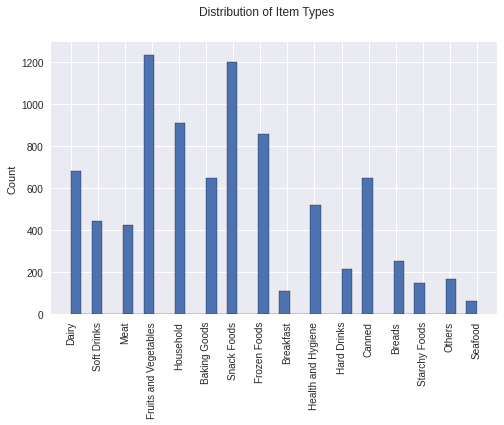

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(8,5))
df['Item_Type'].hist(bins='auto',
                     edgecolor='black')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.suptitle('Distribution of Item Types');

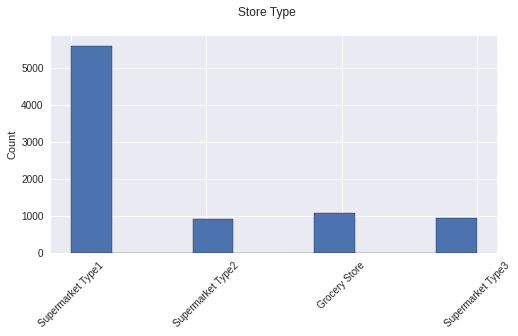

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(8,4))
df['Outlet_Type'].hist(edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.suptitle('Store Type');

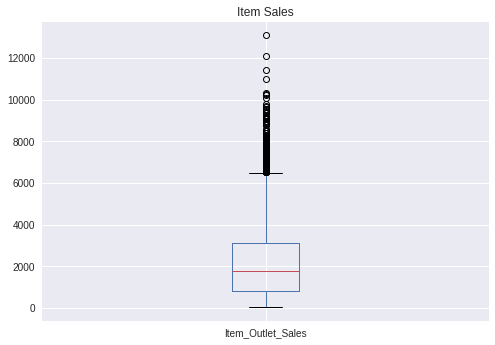

In [ ]:
df.boxplot(column = 'Item_Outlet_Sales')
plt.title('Item Sales')
plt.show()

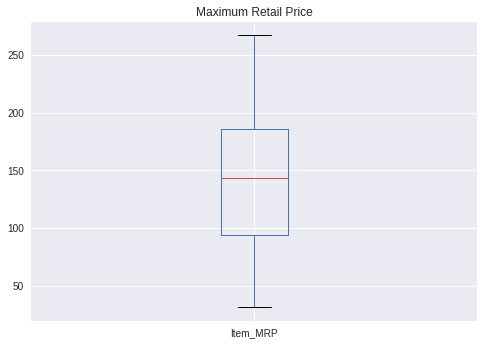

In [ ]:
df.boxplot(column = 'Item_MRP')
plt.title('Maximum Retail Price')
plt.show()

In [ ]:
corr = df.corr()

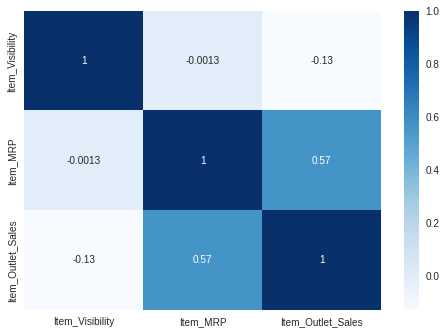

In [ ]:
sns.heatmap(corr, cmap = 'Blues', annot=True)

In [ ]:
item_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().round().sort_values()
item_sales

Item_Type
Seafood                   148868.0
Breakfast                 232299.0
Others                    325518.0
Starchy Foods             351401.0
Hard Drinks               457793.0
Breads                    553237.0
Soft Drinks               892898.0
Meat                      917566.0
Health and Hygiene       1045200.0
Baking Goods             1265525.0
Canned                   1444151.0
Dairy                    1522594.0
Frozen Foods             1825735.0
Household                2055494.0
Snack Foods              2732786.0
Fruits and Vegetables    2820060.0
Name: Item_Outlet_Sales, dtype: float64

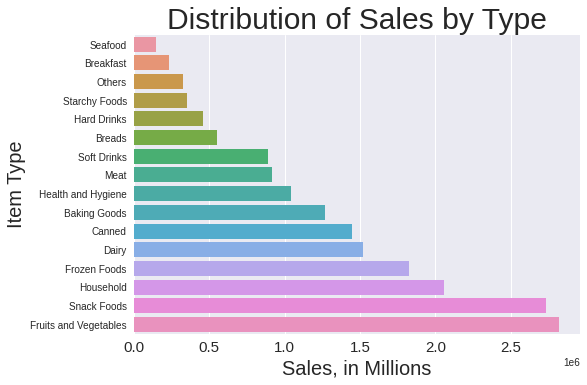

In [ ]:
sns.barplot(data=df, x=item_sales.values, y=item_sales.index)
plt.xticks(fontsize=15);
plt.title('Distribution of Sales by Type', fontsize=30)
plt.xlabel('Sales, in Millions', fontsize=20)
plt.ylabel('Item Type', fontsize=20)
plt.show()

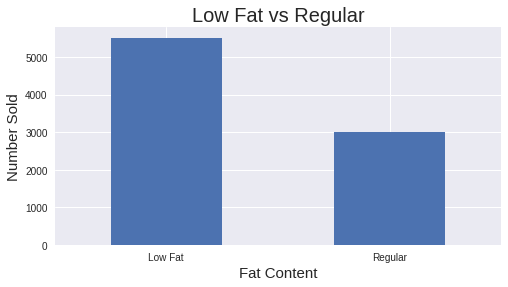

In [ ]:
df['Item_Fat_Content'].value_counts().plot(kind='bar', figsize=(8,4));
plt.xlabel('Fat Content', fontsize=15)
plt.xticks(rotation=0);
plt.ylabel('Number Sold', fontsize=15)
plt.title('Low Fat vs Regular', fontsize=20)
plt.show()

In [ ]:
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_copy.drop(columns='Item_Identifier', inplace=True)
df_copy.drop(columns='Outlet_Identifier', inplace=True)       #drop columns with unique values
df_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector           #imports
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df_copy.duplicated().sum()        #duplicates

0

In [ ]:
df_copy.isna().sum()              #missing values

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
X = df_copy.drop(columns=['Item_Outlet_Sales'])       #X and y split
y=df_copy['Item_Outlet_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)        #train test split

In [ ]:
X_train['Item_Fat_Content'].value_counts()

Low Fat    3783
Regular    2176
LF          260
reg          87
low fat      86
Name: Item_Fat_Content, dtype: int64

In [ ]:
fat_content = {'Low Fat': 0, 'LF': 0, 'low fat': 0, 'Regular': 1, 'reg': 1}     #dictionary

In [ ]:
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace(fat_content)      #apply dictionary changes to X train

In [ ]:
X_train['Item_Fat_Content'].value_counts()      #check to see if it worked

0    4129
1    2263
Name: Item_Fat_Content, dtype: int64

In [ ]:
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace(fat_content)        #apply dictionary to X test

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')        #scaler and ohe

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')      #mean and most frequent imputers

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')     #column selectors

In [ ]:
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)       #pipelines

In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)        #tuples for col transformer

In [ ]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)        #column transformer
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f91bce73890>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f91bce73850>)])

In [ ]:
preprocessor.fit(X_train)         #fit on x train only

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f91bce73890>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f91bce73850>)])

In [ ]:
X_train_processed = preprocessor.transform(X_train)     #transform training and testing
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 31)




array([[ 0.81724868, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score       #Imports

In [ ]:
linreg = LinearRegression()
dumreg = DummyRegressor(strategy='mean')        #instantiate the models

In [ ]:
linreg_pipe = make_pipeline(preprocessor, linreg)     #make a pipeline and fit to it
linreg_pipe.fit(X_train, y_train);

In [ ]:
train_pred = linreg_pipe.predict(X_train)     #use pipeline to make predictions
test_pred = linreg_pipe.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, train_pred)     #MSE
test_mse = mean_squared_error(y_test, test_pred)
print(f'Training MSE : {train_mse}')
print(f'Testing MSE: {test_mse}')

Training MSE : 1298631.8580948587
Testing MSE: 1194496.0878343703


In [ ]:
train_rmse = np.sqrt(train_mse)     #RMSE
test_rmse = np.sqrt(test_mse)
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')     #Roughly a $50 error, not awful

Training RMSE: 1139.5752972466798
Testing RMSE: 1092.930047091016


In [ ]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Training R2: {train_r2}')     #Training and testing were fairly close, with testing being slightly higher
print(f'Testing R2: {test_r2}')

Training R2: 0.5611923313774996
Testing R2: 0.5670511340874513


Regression Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor      #Decision tree import and instantiated
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)       #decision tree pipeline and fit
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91bce73890>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91bce73850>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dec_train_preds = dec_tree_pipe.predict(X_train)      #get predictions
dec_test_preds = dec_tree_pipe.predict(X_test)

In [ ]:
dec_train_score = dec_tree_pipe.score(X_train, y_train)
dec_test_score = dec_tree_pipe.score(X_test, y_test)
print(f'Simple Decision Tree Training Score: {dec_train_score}')
print(f'Simple Decision Tree Testing Score: {dec_test_score}')        #This is an absolutely terrible model

Simple Decision Tree Training Score: 1.0
Simple Decision Tree Testing Score: 0.17143653547322157


In [ ]:
def evaluate_regression(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)        #function to print scores of models
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [ ]:
print('Training')
evaluate_regression(y_train, dec_train_preds)       #print decision tree model scores
print('Testing')
evaluate_regression(y_test, dec_test_preds)

Training
MAE 1.0671480386885109e-16,
 MSE 2.4264137179864312e-29,
 RMSE: 4.925864104892086e-15,
 R^2: 1.0 
Testing
MAE 1049.333918160488,
 MSE 2285987.7801357764,
 RMSE: 1511.948339109434,
 R^2: 0.17143653547322157 


For this specific case of sales predictions for Big Mart, I would recommend using neither of the models provided. The Linear Regression Model is only preforming at 56% for both the training and testing data and needs more tuning, work, and analysis to increase its functionality.

The Decision Tree Model is preforming poorly as well, with results that are extremely skewed on the Testing Data. This may be due to an error on my part, or with the data itself. This model needs to be reworked and fine tuned to preform well. The R2 score on the testing date itself is 83 points off from the training data, which is highly unacceptable if it would need to be deployed in the real world.